In [1]:
import sys
sys.path.append('/app')
from src.utils import data_utils
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_date = '2011-03-01'

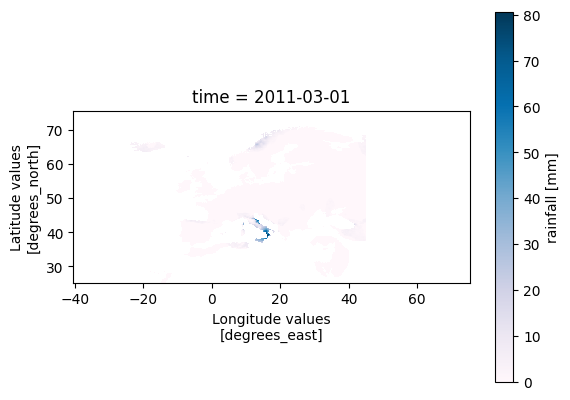

In [25]:
var_ebosa = 'rr'
path_ebosa = f'/app/data/e-obs/ensemble_mean/025_grid/2011-2023/{var_ebosa}_v28.0e.nc'
z_ebosa = xr.open_mfdataset(path_ebosa)
lat_lims_ebosa = (float(z_ebosa.latitude.min().data), float(z_ebosa.latitude.max().data))
lon_lims_ebosa = (float(z_ebosa.longitude.min().data), float(z_ebosa.longitude.max().data))
# z_ebosa
z_ebosa = z_ebosa.sel(time=sample_date)
# z_ebosa = z_ebosa.to_array()
z_ebosa = z_ebosa[var_ebosa]
z_ebosa
plt.figure()
ax = z_ebosa.plot(cmap='PuBu') #PuBu for prcp, RdBu_r inverse for temperate
ax.axes.set_aspect('equal')
plt.show()

In [13]:
def lon_360_to_180(da):
    try:
        da = da.assign_coords({'longitude': (da.longitude.data + 180) % 360 - 180})
        da = da.sortby('longitude')
    except AttributeError:
        da = da.assign_coords({'lon': (da.lon.data + 180) % 360 - 180})
        da = da.sortby('lon')
    return da



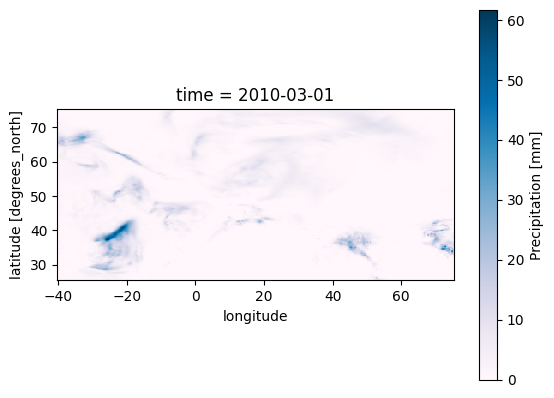

In [30]:
path_era = '/app/data/era5/total_precipitation_2010.zarr'
z_era = xr.open_zarr(path_era)

# z_cmip = z_cmip.assign_coords({'longitude': (z_cmip.longitude.data + 180) % 360 - 180})
# z_era = z_era.sortby('longitude')
z_era = lon_360_to_180(z_era)
z_era = z_era.sel(latitude=slice(lat_lims_ebosa[-1], lat_lims_ebosa[0]))
z_era = z_era.sel(longitude=slice(lon_lims_ebosa[0], lon_lims_ebosa[1]))
z_era = z_era.sel(time=z_ebosa.time.data - np.timedelta64(365,'D'))
z_era = z_era['total_precipitation']
z_era *= 1000
plt.figure()
ax = z_era.plot(cmap='PuBu', cbar_kwargs={'label': "Precipitation [mm]"}) #PuBu for prcp, RdBu_r inverse for temperate
ax.axes.set_aspect('equal')
plt.show()
# z = data_utils.read_zarr(path, 1)
# z.plot()

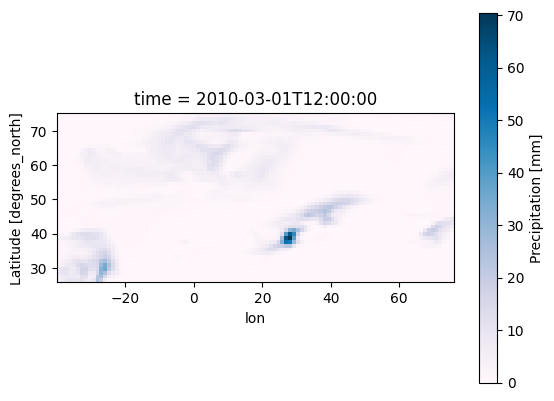

In [29]:
path_cmip = '/app/data/cmip6/pr_day_MRI-ESM2-0_historical_r1i1p1f1_gn_20000101-20141231.nc'
z_cmip = xr.open_mfdataset(path_cmip)
z_cmip
z_cmip = lon_360_to_180(z_cmip)
z_cmip = z_cmip.sel(lat=slice(lat_lims_ebosa[0], lat_lims_ebosa[1]))
z_cmip = z_cmip.sel(lon=slice(lon_lims_ebosa[0], lon_lims_ebosa[1]))
z_cmip = z_cmip.sel(time=z_ebosa.time.data - np.timedelta64(365,'D') + np.timedelta64(12,'h'))
z_cmip = z_cmip['pr']
z_cmip *= 86400
plt.figure()
ax = z_cmip.plot(cmap='PuBu', cbar_kwargs={'label': "Precipitation [mm]"}) #PuBu for prcp, RdBu_r inverse for temperate
ax.axes.set_aspect('equal')
plt.show()